# Capstone Project: Predicting Post-COVID-19 Housing Market Trends

## Description of the Data
The dataset used in this analysis is `USA_Housing.csv`, which contains various features related to housing such as average area number of rooms, area population, price, etc. This data will help us understand how different factors are influencing the housing market trends post-COVID-19.

## Importing Libraries

In [33]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
import seaborn as sns

## Loading and Checking the Dataset

In [34]:
data = pd.read_csv('/content/drive/MyDrive/Capstone Project Details/Updated_Enhanced_USA_Housing_with_Dates.csv')
data.head()

,Unnamed: 0,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address,State,City,ZIP Code,Property Type,Square Footage,Lot Size,Year Built,Garage Space,Unemployment Rate,Median Household Income,Average School Score,Date
0,0,63437.47025,5.938082,5.769596,4.144390,32488.12680,8.988232e+05,"330 Alexander Square\nNorth Allison, NV 01942-...",NE,CityA,76878.08802,Multi-Family,1416.231279,0.961088,2088.880411,2.828894,10.208766,79179.78817,1.869601,2017-03-01
1,1,70305.58691,6.010513,9.227369,6.035258,42315.18059,1.590769e+06,"915 Brian Brook\nStephanieton, FL 61769-6794",FL,CityC,62363.00880,Rental,3232.864129,0.590708,1953.264735,1.015770,8.259303,122609.04570,7.815740,2017-04-01
2,2,48480.10904,6.381089,6.806402,3.651717,51203.60613,1.215075e+06,"3818 Stevenson Springs Suite 756\nClarkburgh, ...",WI,CityE,16758.08194,Residential,3018.374302,0.681231,1952.957400,0.001178,2.461437,35063.60403,8.153820,2017-05-01
3,3,64064.92520,7.206126,8.687638,5.762195,39196.33739,1.145586e+06,"27645 Kline River\nPort Samuelside, GU 06730",TX,CityB,61680.52242,Residential,3850.451899,0.924329,1892.393385,1.937762,3.889346,83661.18096,4.943505,2017-06-01
4,4,NaN,4.626105,6.206283,2.132105,44608.70905,1.676542e+06,USCGC Bowman\nFPO AP 06884-6883,FL,CityA,78284.09706,Residential,1484.333967,0.513721,1841.615052,0.889132,5.180156,35838.63859,8.125375,2017-07-01


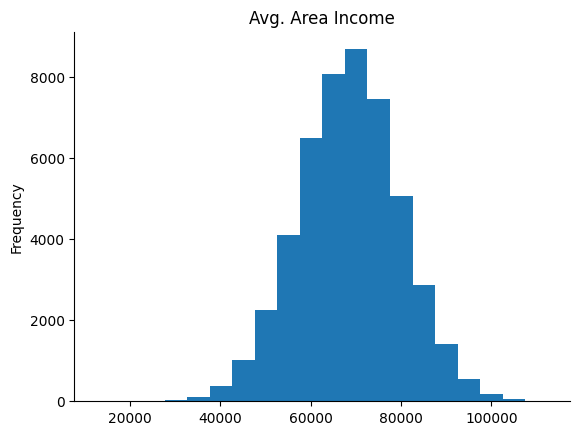

In [35]:
# @title Avg. Area Income

from matplotlib import pyplot as plt
data['Avg. Area Income'].plot(kind='hist', bins=20, title='Avg. Area Income')
plt.gca().spines[['top', 'right',]].set_visible(False)

## Exploratory Data Analysis

In [36]:
data.describe()

,Unnamed: 0,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,ZIP Code,Square Footage,Lot Size,Year Built,Garage Space,Unemployment Rate,Median Household Income,Average School Score
count,50000.000000,48755.000000,49999.000000,48752.000000,49997.000000,49998.000000,4.999900e+04,49994.000000,49996.000000,49996.000000,49998.000000,49997.000000,49998.000000,48767.000000,49998.000000
mean,24999.500000,68542.159064,5.976433,6.989030,3.980521,36163.717077,1.047315e+06,54699.416007,2998.960983,0.559697,1969.673265,1.505772,6.034952,89656.419931,5.036588
std,14433.901067,11198.693095,1.035257,1.065484,1.250241,10095.679722,3.064186e+05,26511.445968,1164.674563,0.260929,102.863581,1.115518,2.314628,35047.251795,2.596215
min,0.000000,12647.244070,1.957462,3.012394,1.418740,-2102.292383,-6.251355e+04,1741.548132,520.292086,0.011671,1528.133184,-0.271462,1.082942,17556.277270,-0.117192
25%,12499.750000,61070.549705,5.280143,6.269189,3.101691,29291.080213,8.406070e+05,31547.042742,1985.980821,0.338936,1900.044061,0.822752,4.083507,59116.226520,2.865645
50%,24999.500000,68645.419320,5.971748,7.003737,3.941450,36138.355195,1.045751e+06,54902.793730,2980.506994,0.567218,1968.968494,1.849729,6.060535,89948.952620,5.054524
75%,37499.250000,75996.277595,6.673445,7.713491,4.699524,42934.225130,1.254703e+06,77491.989730,4017.594765,0.781240,2038.721614,2.172260,8.010153,119686.017750,7.206121
max,49999.000000,112492.422500,9.729908,11.457487,7.050275,74364.950610,2.199462e+06,106913.377900,5484.261570,1.097106,2378.517775,3.279480,10.838296,164154.837400,9.927534


## Data Visualization

In [37]:
# sns.pairplot(data)

Unnamed: 0                         0
Avg. Area Income                1245
Avg. Area House Age                1
Avg. Area Number of Rooms       1248
Avg. Area Number of Bedrooms       3
Area Population                    2
Price                              1
Address                            2
State                              4
City                               3
ZIP Code                           6
Property Type                      2
Square Footage                     4
Lot Size                           4
Year Built                         2
Garage Space                       3
Unemployment Rate                  2
Median Household Income         1233
Average School Score               2
Date                               0
dtype: int64


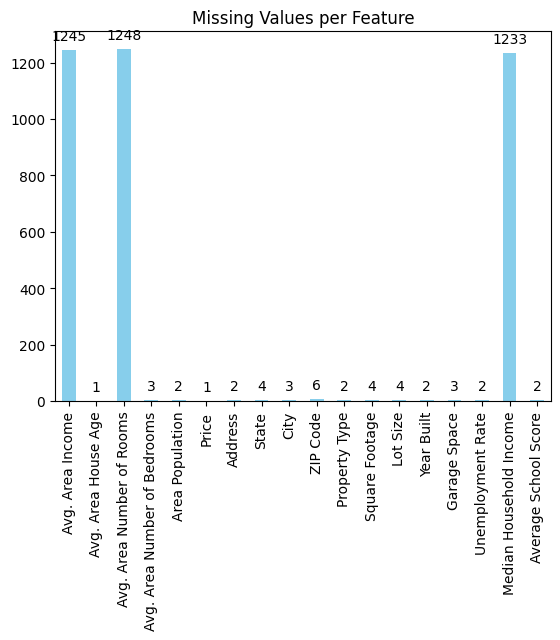

In [38]:
import pandas as pd
import matplotlib.pyplot as plt

# Calculate missing values
missing_values = data.isnull().sum()
print(missing_values)

# Plot missing values for columns with any missing data
missing_data = missing_values[missing_values > 0]
ax = missing_data.plot(kind='bar', color='skyblue')
plt.title('Missing Values per Feature')

# Annotate each bar with the count of missing values
for p in ax.patches:
    ax.annotate(str(int(p.get_height())), (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.show()

In [39]:
print(f'Data count before droping NaN - {len(data)}')
data.dropna(inplace=True)
print(f'Data count after droping NaN - {len(data)}')

Data count before droping NaN - 50000
Data count after droping NaN - 46335


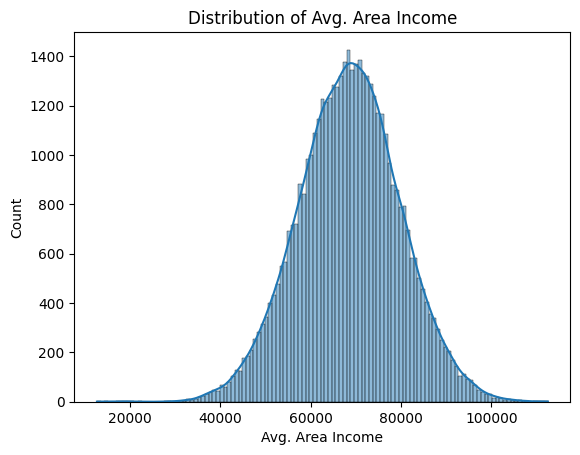

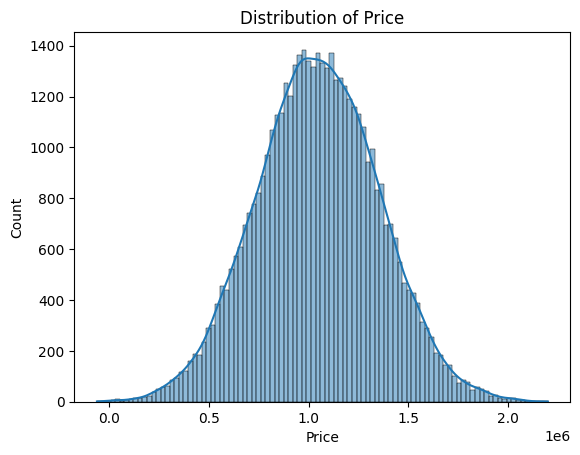

In [40]:
import seaborn as sns

# Plot distribution for 'Avg. Area Income'
sns.histplot(data['Avg. Area Income'], kde=True)
plt.title('Distribution of Avg. Area Income')
plt.show()

# Plot distribution for 'Price'
sns.histplot(data['Price'], kde=True)
plt.title('Distribution of Price')
plt.show()


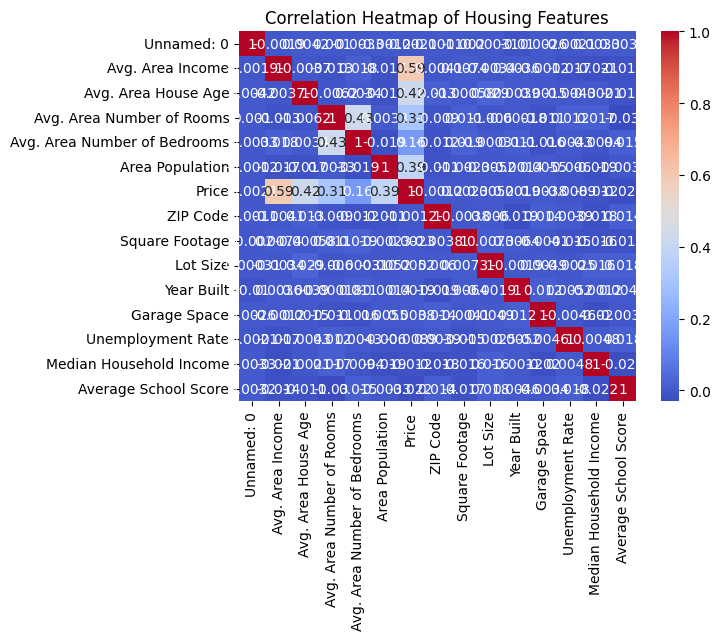

In [41]:
# Compute correlation matrix for numeric columns only
numeric_data = data.select_dtypes(include=[np.number])  # Select only numeric columns
corr = numeric_data.corr()

# Generate a heatmap
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap of Housing Features')
plt.show()


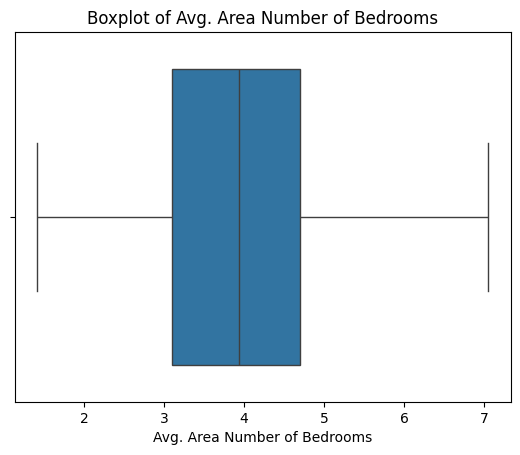

In [42]:
# Boxplot for 'Avg. Area Number of Bedrooms'
sns.boxplot(x=data['Avg. Area Number of Bedrooms'])
plt.title('Boxplot of Avg. Area Number of Bedrooms')
plt.show()


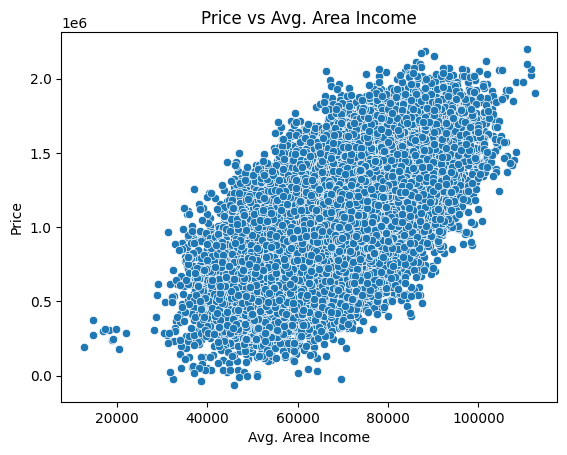

In [43]:
# Scatter plot for 'Price' vs 'Avg. Area Income'
sns.scatterplot(x='Avg. Area Income', y='Price', data=data)
plt.title('Price vs Avg. Area Income')
plt.show()


In [44]:
# import pandas as pd
# import numpy as np

# # Load your dataset
# data = pd.read_csv('/content/drive/MyDrive/Capstone Project Details/Enhanced_USA_Housing.csv')  # Adjust the path as necessary

# # Generate Date column with monthly frequency from March 2017 to January 2024
# dates = pd.date_range(start='2017-03-01', end='2024-01-31', freq='MS')
# repeated_dates = np.resize(dates, data.shape[0])
# data['Date'] = repeated_dates

# # Impute Price data influenced by COVID-19 trends
# covid_start_index = data[data['Date'] >= '2020-01-01'].index.min()
# covid_end_index = data[data['Date'] <= '2021-12-01'].index.max()
# data.loc[covid_start_index:covid_end_index, 'Price'] *= np.random.uniform(0.8, 0.9, size=(covid_end_index - covid_start_index + 1))
# recovery_start_index = covid_end_index + 1
# recovery_end_index = data[data['Date'] <= '2024-01-01'].index.max()
# recovery_factor = np.linspace(1.0, 1.1, recovery_end_index - recovery_start_index + 1)
# data.loc[recovery_start_index:recovery_end_index, 'Price'] *= recovery_factor

# # Save the modified dataset
# data.to_csv('/content/drive/MyDrive/Capstone Project Details/Updated_Enhanced_USA_Housing_with_Dates.csv')

# print("Dataset updated and saved.")


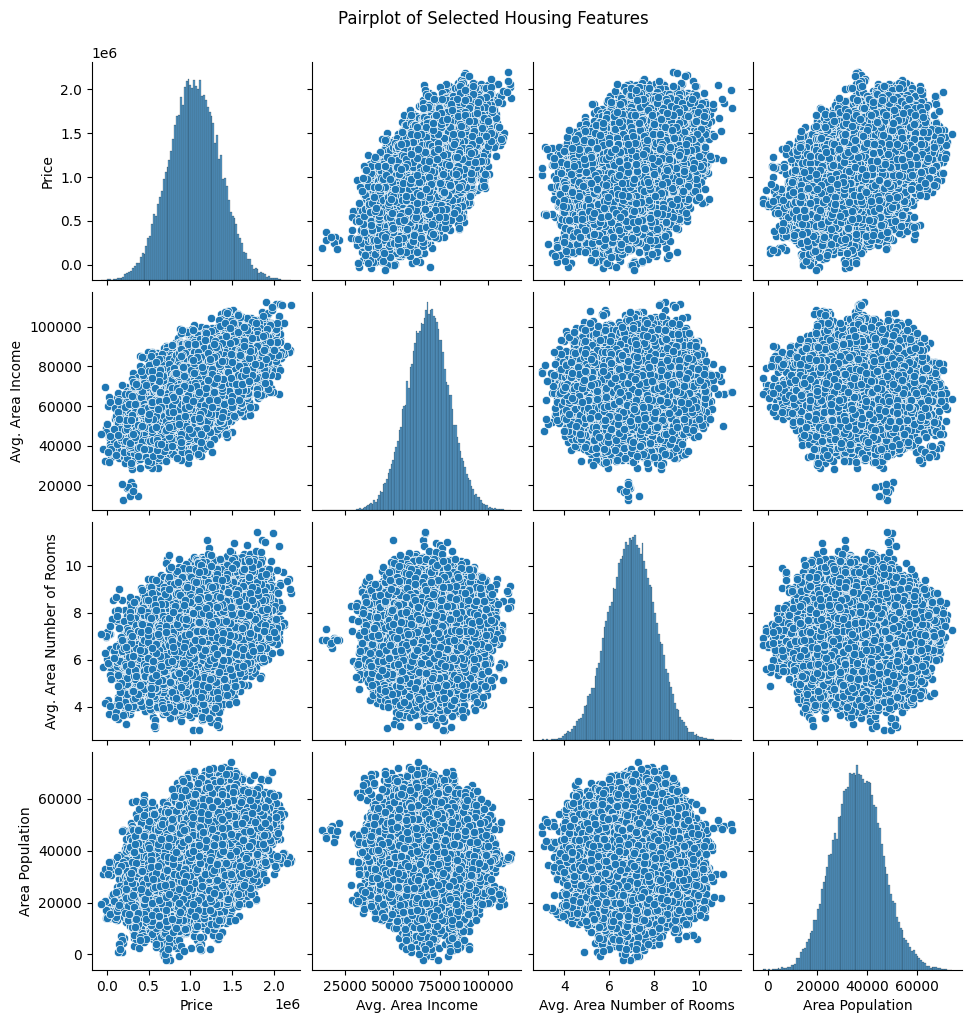

In [45]:
# Select a subset of columns for the pairplot
subset_data = data[['Price', 'Avg. Area Income', 'Avg. Area Number of Rooms', 'Area Population']]

# Generate a pairplot
sns.pairplot(subset_data)
plt.suptitle('Pairplot of Selected Housing Features', y=1.02)  # Adjust y for title spacing
plt.show()


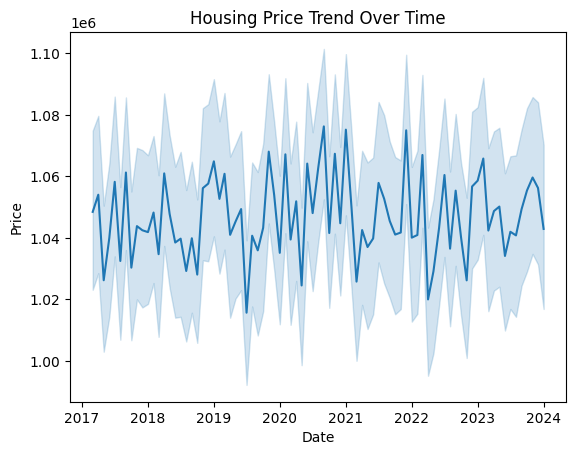

In [46]:
# Example line chart for price trend over time
# This assumes that there's a 'Date' column in your dataset

data['Date'] = pd.to_datetime(data['Date'])  # Convert date column to datetime
data.sort_values('Date', inplace=True)  # Sort the data by date

sns.lineplot(x='Date', y='Price', data=data)
plt.title('Housing Price Trend Over Time')
plt.show()


## House Age vs Price Comparison with Heat Map

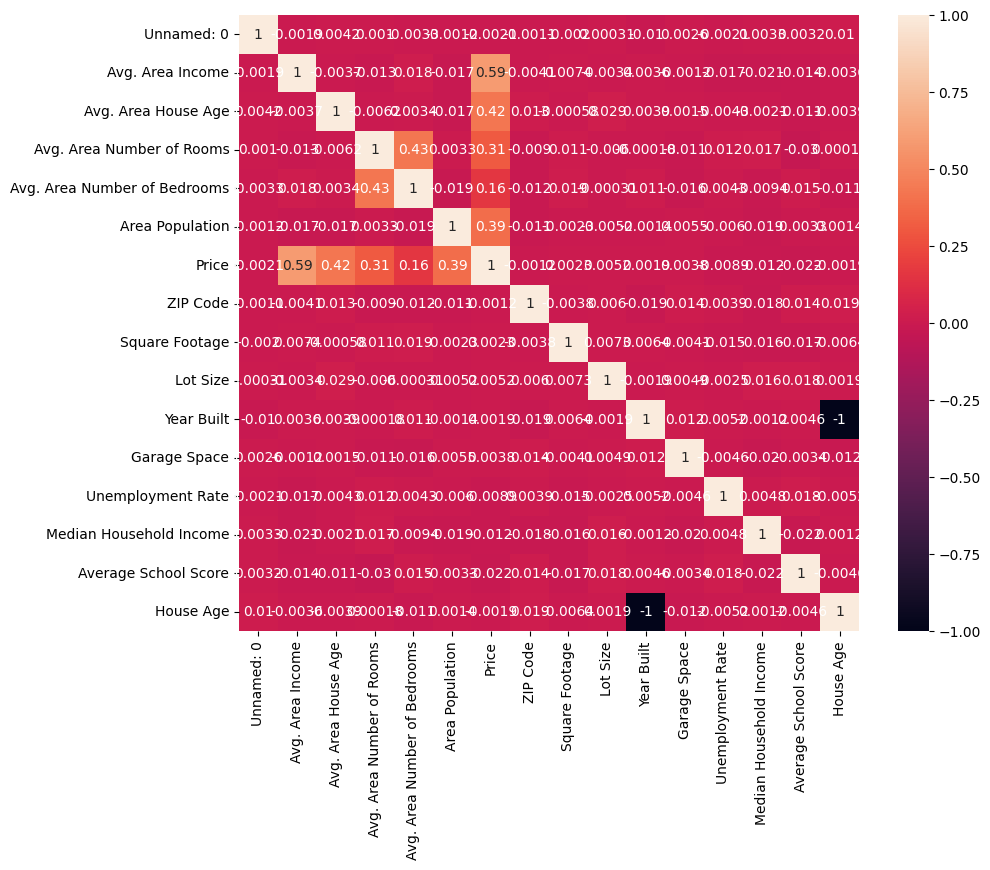

In [47]:
data['House Age'] = 2023 - data['Year Built']
numeric_data = data.select_dtypes(include=[np.number])  # Select only numeric columns

correlation_matrix = numeric_data.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True)
plt.show()

In [48]:
from sklearn.preprocessing import OneHotEncoder

# Let's assume 'State' is a non-numeric column you want to include
encoder = OneHotEncoder()
X = data.drop(['Price','Address',], axis=1)
state_encoded = encoder.fit_transform(X[['State']])
state_encoded = encoder.fit_transform(X[['City']])
state_encoded = encoder.fit_transform(X[['Property Type']])
state_encoded = encoder.fit_transform(X[['Date']])

# Now, combine this with your numeric data (excluding 'State' from X if it was there)
X_numeric = data.select_dtypes(include=[np.number])
X_combined = np.hstack((X_numeric.values, state_encoded.toarray()))

## Target Variable Selection

In [49]:
# X = data.drop(['Price','Address', 'City', 'Property Type', 'Date'], axis=1)
y = data['Price']

## Scaling the Input Features

In [50]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_combined)

## Implementing Models

In [51]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Linear Regression
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)
linear_predictions = linear_model.predict(X_test)
linear_mse = mean_squared_error(y_test, linear_predictions)
linear_r2 = r2_score(y_test, linear_predictions)

# Gradient Boosting
gb_model = GradientBoostingRegressor(random_state=42)
gb_model.fit(X_train, y_train)
gb_predictions = gb_model.predict(X_test)
gb_mse = mean_squared_error(y_test, gb_predictions)
gb_r2 = r2_score(y_test, gb_predictions)

# Random Forest
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)
rf_predictions = rf_model.predict(X_test)
rf_mse = mean_squared_error(y_test, rf_predictions)
rf_r2 = r2_score(y_test, rf_predictions)

## Model Comparison

In [52]:
results = pd.DataFrame({
    'Model': ['Linear Regression', 'Gradient Boosting', 'Random Forest'],
    'MSE': [linear_mse, gb_mse, rf_mse],
    'R-squared': [linear_r2, gb_r2, rf_r2]
})
print(results)

               Model           MSE  R-squared
0  Linear Regression  1.683703e-19   1.000000
1  Gradient Boosting  9.264172e+06   0.999901
2      Random Forest  1.097533e+05   0.999999


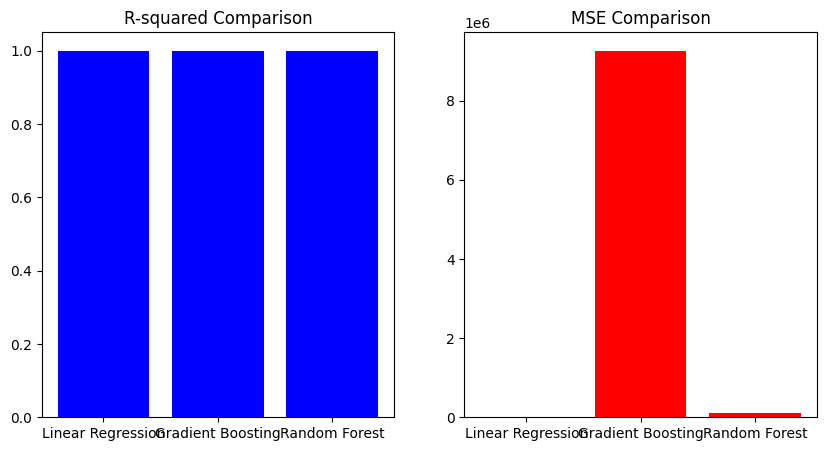

In [53]:
# Plotting for visual comparison
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.bar(results['Model'], results['R-squared'], color='b')
plt.title('R-squared Comparison')
plt.subplot(1, 2, 2)
plt.bar(results['Model'], results['MSE'], color='r')
plt.title('MSE Comparison')
plt.show()

In [54]:
from sklearn.svm import SVR

# Initialize and train the model
svm_model = SVR(kernel='linear')
svm_model.fit(X_train, y_train)

# Predict and evaluate
svm_predictions = svm_model.predict(X_test)
svm_mse = mean_squared_error(y_test, svm_predictions)
svm_r2 = r2_score(y_test, svm_predictions)

print("SVM MSE:", svm_mse)
print("SVM R-squared:", svm_r2)


SVM MSE: 64120856714.23732
SVM R-squared: 0.31298141947815084


In [55]:
from sklearn.neighbors import KNeighborsRegressor

# Initialize and train the model
knn_model = KNeighborsRegressor(n_neighbors=5)
knn_model.fit(X_train, y_train)

# Predict and evaluate
knn_predictions = knn_model.predict(X_test)
knn_mse = mean_squared_error(y_test, knn_predictions)
knn_r2 = r2_score(y_test, knn_predictions)

print("KNN MSE:", knn_mse)
print("KNN R-squared:", knn_r2)


KNN MSE: 23515548120.79566
KNN R-squared: 0.7480442508411604


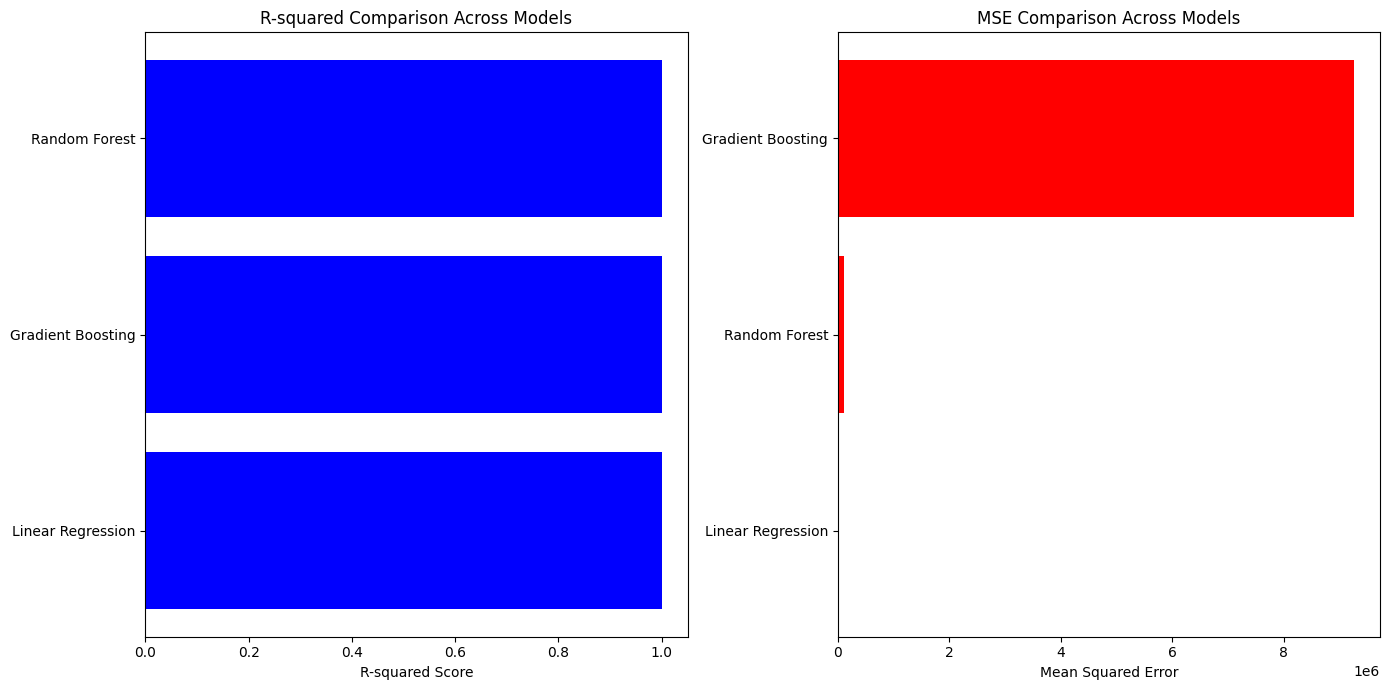

In [56]:
# Create a horizontal bar plot for R-squared values
plt.figure(figsize=(14, 7))
plt.subplot(1, 2, 1)
plt.barh(results['Model'], results['R-squared'], color='blue')
plt.xlabel('R-squared Score')
plt.title('R-squared Comparison Across Models')

# Sort by MSE in ascending order for logical high-to-low left-to-right visual comparison
all_results = results.sort_values(by='MSE')

# Create a horizontal bar plot for MSE values
plt.subplot(1, 2, 2)
plt.barh(all_results['Model'], all_results['MSE'], color='red')
plt.xlabel('Mean Squared Error')
plt.title('MSE Comparison Across Models')

plt.tight_layout()
plt.show()

In [57]:
import numpy as np
from sklearn.linear_model import LinearRegression
import joblib  # For loading/saving models

# Load your model
joblib.dump(rf_model, '/content/drive/MyDrive/Capstone Project Details/rf_model.pkl')


['/content/drive/MyDrive/Capstone Project Details/rf_model.pkl']

In [58]:
# Load the model
model = joblib.load('/content/drive/MyDrive/Capstone Project Details/rf_model.pkl')

# If the model is a scikit-learn pipeline where the final estimator is a model,
# and the training data included feature names:

if hasattr(model, 'feature_names_in_'):
    print(model.feature_names_in_)

# If the pipeline steps include transformers and a final estimator:
elif hasattr(model, 'named_steps') and 'final_estimator' in model.named_steps:
    estimator = model.named_steps['final_estimator']
    if hasattr(estimator, 'feature_names_in_'):
        print(estimator.feature_names_in_)
else:
  # Load the dataset
  data = pd.read_csv('/content/drive/MyDrive/Capstone Project Details/Updated_Enhanced_USA_Housing_with_Dates.csv')

  # Assuming the last column is the target variable
  features = data.columns[:-1]  # Adjust slicing as necessary
  print(features)
  print(data.head())

Index(['Unnamed: 0', 'Avg. Area Income', 'Avg. Area House Age',
       'Avg. Area Number of Rooms', 'Avg. Area Number of Bedrooms',
       'Area Population', 'Price', 'Address', 'State', 'City', 'ZIP Code',
       'Property Type', 'Square Footage', 'Lot Size', 'Year Built',
       'Garage Space', 'Unemployment Rate', 'Median Household Income',
       'Average School Score'],
      dtype='object')
   Unnamed: 0  Avg. Area Income  Avg. Area House Age  \
0           0       63437.47025             5.938082   
1           1       70305.58691             6.010513   
2           2       48480.10904             6.381089   
3           3       64064.92520             7.206126   
4           4               NaN             4.626105   

   Avg. Area Number of Rooms  Avg. Area Number of Bedrooms  Area Population  \
0                   5.769596                      4.144390      32488.12680   
1                   9.227369                      6.035258      42315.18059   
2                   6.8064

In [59]:

# If the model is not saved, ensure it's trained and replace the load with the model instance
model = joblib.load('/content/drive/MyDrive/Capstone Project Details/rf_model.pkl')  # Update path accordingly

# Function to accept user input
def get_user_input():
    # Example features (extending this to 99 features)
    features = np.zeros(99)  # Initialize all features with zeros or another default value

    # Prompt user for some key features
    year_built = float(input("Enter Year Built: "))
    bedrooms = float(input("Enter number of Bedrooms: "))
    bathrooms = float(input("Enter number of Bathrooms: "))
    salary = float(input("Enter salary: "))

    # Set these user-provided values in their respective positions
    features[1] = salary
    features[2] = bedrooms
    features[3] = bathrooms
    features[14] = year_built


    # Set other features as needed, possibly with default or imputed values
    # For example, if there are categorical features that need to be encoded or other numerical features:
    # features[2] = default_value_for_feature_3
    # features[3] = default_value_for_feature_4
    # ... until all 99 features are accounted for

    return features.reshape(1, -1)  # Reshape for compatibility with model input


# Function to make a prediction
def make_prediction(input_data):
    prediction = model.predict(input_data)
    return prediction

# Main function to run the process
def main():
    user_input = get_user_input()  # Get user input
    prediction = make_prediction(user_input)  # Make prediction
    print(f"Predicted Output: {prediction[0]}")  # Print the predicted output

# Run the main function
if __name__ == "__main__":
    main()


Enter Year Built: 2022
Enter number of Bedrooms: 4
Enter number of Bathrooms: 2
Enter salary: 110000
Predicted Output: 1047025.3119395842
